In [8]:
import os
import pandas as pd

# Set the paths
input_folder = r'C:\TechnoEdge Monthly sales data unzipped\TechnoEdge Monthy Sales Data\TechnoEdge Monthy Sales Data'
output_folder = r'C:\TechnoEdge Monthly sales data unzipped\tecnoedge combined csv in one'
output_path = os.path.join(output_folder, 'combined.csv')

# List all CSV files in the input folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each CSV file, read it, and append its DataFrame to the list
for csv_file in csv_files:
    csv_path = os.path.join(input_folder, csv_file)
    data = pd.read_csv(csv_path, encoding='ISO-8859-1')  # Use the appropriate encoding
    dataframes.append(data)

# Concatenate all DataFrames in the list
merged_data = pd.concat(dataframes, ignore_index=True)

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Write the merged_data DataFrame to the output CSV file
merged_data.to_csv(output_path, index=False)

print("Merging and writing completed.")


Merging and writing completed.


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,126,US-2018-134614,2022-09-20,2022-09-25,Standard Class,PF-19165,Philip Fox,Consumer,United States,Bloomington,...,61701,Central,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,617.700,6,0.5,-407.6820
1,165,CA-2018-139892,2022-09-08,2022-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,OFF-AR-10004441,Office Supplies,Art,BIC Brite Liner Highlighters,9.936,3,0.2,2.7324
2,166,CA-2018-139892,2022-09-08,2022-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
3,167,CA-2018-139892,2022-09-08,2022-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,OFF-ST-10000991,Office Supplies,Storage,Space Solutions HD Industrial Steel Shelving.,275.928,3,0.2,-58.6347
4,168,CA-2018-139892,2022-09-08,2022-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,1740.060,9,0.3,-24.8580


In [14]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State              object
Postal Code         int64
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [16]:
# Find null values in each column
null_counts = merged_data.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


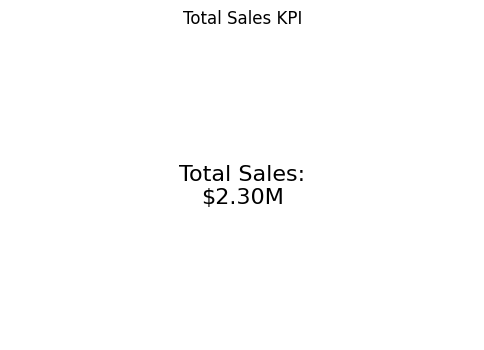

In [19]:

# Calculate the summation of sales
total_sales = merged_data['Sales'].sum()

# Format the total sales value as "2.30M"
formatted_sales = f'{total_sales/1000000:.2f}M'

# Create a KPI card visualization
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Total Sales:\n${formatted_sales}', ha='center', va='center', fontsize=16)
plt.axis('off')  # Turn off axes
plt.title('Total Sales KPI')
plt.show()


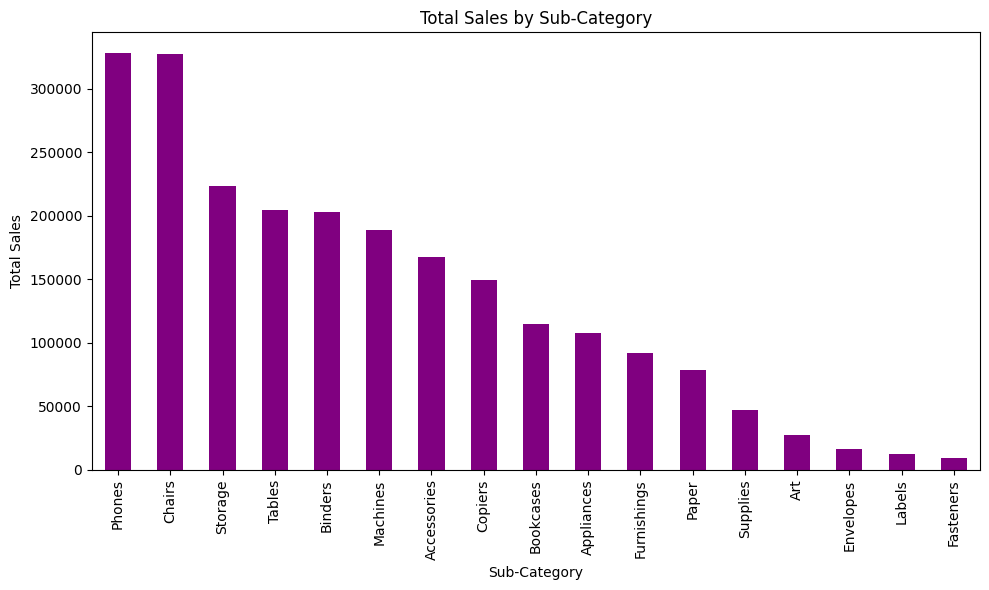

In [27]:

# Calculate total sales for each sub-category
sub_category_sales = merged_data.groupby('Sub-Category')['Sales'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
sub_category_sales.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sub-Category')
plt.tight_layout()
plt.show()


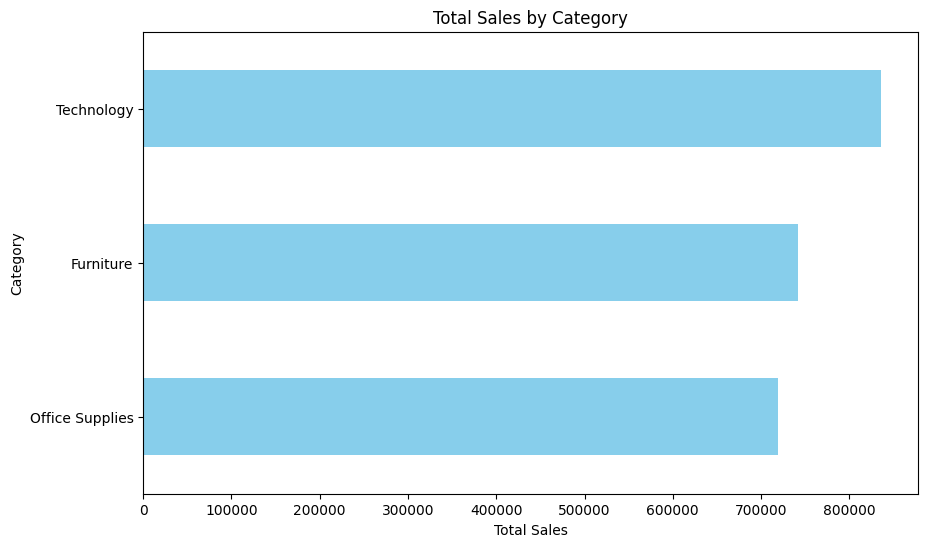

In [28]:

# Group data by category and calculate total sales for each category
category_sales = merged_data.groupby('Category')['Sales'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sales.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.title('Total Sales by Category')
plt.show()


<Figure size 1200x600 with 0 Axes>

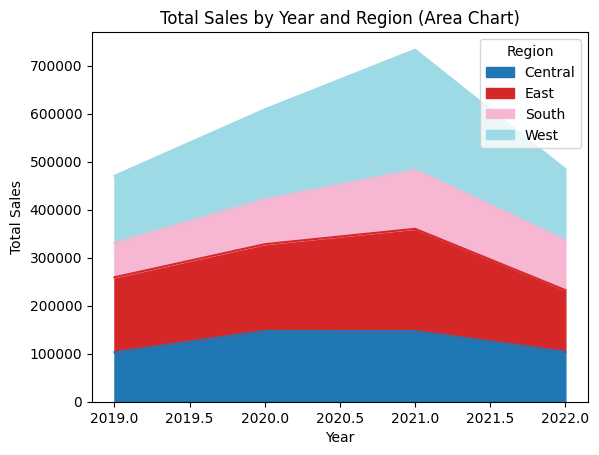

In [29]:

# Convert 'Order Date' column to datetime
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

# Extract year from 'Order Date'
merged_data['Year'] = merged_data['Order Date'].dt.year

# Group data by 'Year' and 'Region' and calculate total sales
yearly_region_sales = merged_data.groupby(['Year', 'Region'])['Sales'].sum().unstack()

# Create an area chart
plt.figure(figsize=(12, 6))
yearly_region_sales.plot(kind='area', colormap='tab20')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year and Region (Area Chart)')
plt.legend(title='Region')
plt.show()


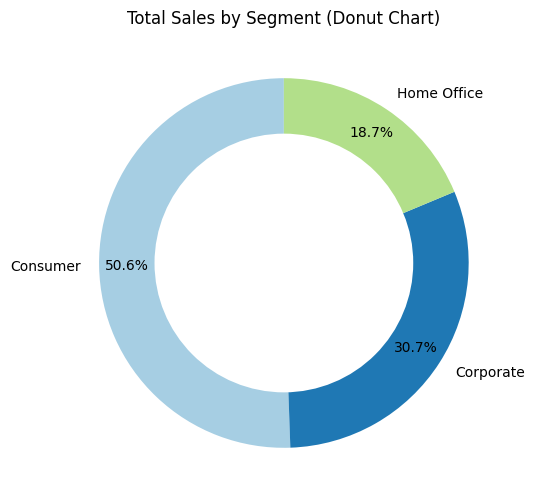

In [31]:

# Group data by segment and calculate total sales
segment_sales = merged_data.groupby('Segment')['Sales'].sum()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired.colors)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Total Sales by Segment (Donut Chart)')
plt.show()


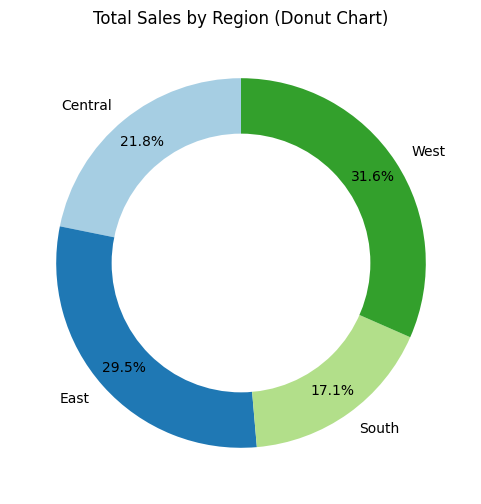

In [33]:
# Group data by region and calculate total sales
region_sales = merged_data.groupby('Region')['Sales'].sum()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired.colors)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Total Sales by Region (Donut Chart)')
plt.show()
